In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from math import factorial as fact
from numpy import sqrt
import commpy
from random import shuffle
from scipy.stats import norm
import pandas as pd
π = np.pi
tol = 1e-14
num_trials = 1000
num_points = 500
max_iters = 1000

In [2]:
df = pd.read_csv('/Users/darren/IRES_DATA/Trial_Results',index_col=0)
df.describe()

,M.T.R.,Time,N.R.A.,M.N.P.R,M.W.P.,AM PEP,PL,N.Packets
count,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.0,4000.0
mean,10.736750,65.825885,1.0,90.929000,2.500000,0.556091,11.0,100.0
std,3.616728,120.518340,0.0,3.084775,1.118174,0.065058,0.0,0.0
min,5.000000,38.914489,1.0,80.000000,1.000000,0.388299,11.0,100.0
25%,8.000000,50.981687,1.0,89.000000,1.750000,0.495607,11.0,100.0
50%,10.000000,61.410694,1.0,91.000000,2.500000,0.560192,11.0,100.0
75%,13.000000,70.341957,1.0,93.000000,3.250000,0.617457,11.0,100.0
max,31.000000,5280.110986,1.0,99.000000,4.000000,0.675302,11.0,100.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0cdfcef0>]],
      dtype=object)

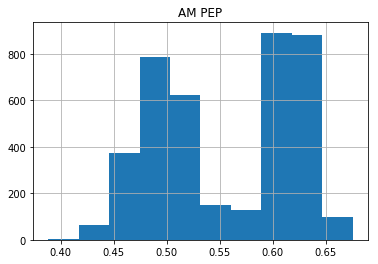

In [3]:
df.hist(column='AM PEP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105d08f28>]],
      dtype=object)

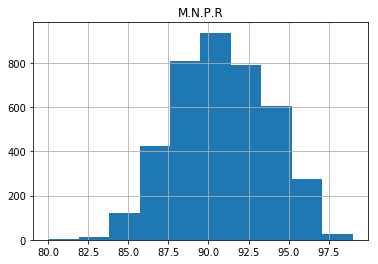

In [4]:
df.hist(column='M.N.P.R')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ce3ab00>]],
      dtype=object)

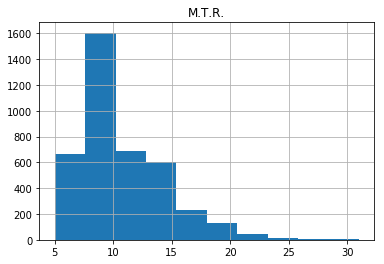

In [5]:
df.hist(column='M.T.R.')

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


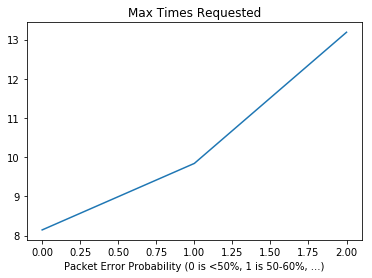

In [6]:
val1 = np.average(df.loc[df['AM PEP'] <= 0.5]['M.T.R.'])
val2 = df.loc[df['AM PEP'] <= 0.6]
val2 = np.average(val2.loc[val2['AM PEP'] > 0.5]['M.T.R.'])
val3 = df.loc[df['AM PEP'] <= 0.7]
val3 = np.average(val3.loc[val3['AM PEP'] > 0.6]['M.T.R.'])
val4 = df.loc[df['AM PEP'] <= 0.8]
val4 = np.average(val4.loc[val4['AM PEP'] > 0.7]['M.T.R.'])
val5 = df.loc[df['AM PEP'] <= 0.9]
val5 = np.average(val5.loc[val5['AM PEP'] > 0.8]['M.T.R.'])
val6 = df.loc[df['AM PEP'] <= 1.0]
val6 = np.average(val6.loc[val6['AM PEP'] > 0.9]['M.T.R.'])
values = [val1, val2, val3, val4, val5, val6]
plt.plot(range(len(values)),values)
plt.title('Max Times Requested')
plt.xlabel('Packet Error Probability (0 is <50%, 1 is 50-60%, ...)')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


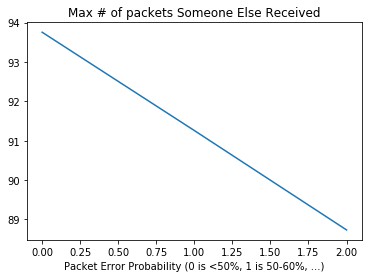

In [11]:
val1 = np.average(df.loc[df['AM PEP'] <= 0.5]['M.N.P.R'])
val2 = df.loc[df['AM PEP'] <= 0.6]
val2 = np.average(val2.loc[val2['AM PEP'] > 0.5]['M.N.P.R'])
val3 = df.loc[df['AM PEP'] <= 0.7]
val3 = np.average(val3.loc[val3['AM PEP'] > 0.6]['M.N.P.R'])
val4 = df.loc[df['AM PEP'] <= 0.8]
val4 = np.average(val4.loc[val4['AM PEP'] > 0.7]['M.N.P.R'])
val5 = df.loc[df['AM PEP'] <= 0.9]
val5 = np.average(val5.loc[val5['AM PEP'] > 0.8]['M.N.P.R'])
val6 = df.loc[df['AM PEP'] <= 1.0]
val6 = np.average(val6.loc[val6['AM PEP'] > 0.9]['M.N.P.R'])
values = [val1, val2, val3, val4, val5, val6]
plt.plot(range(len(values)),values)
plt.title('Max # of packets Someone Else Received')
plt.xlabel('Packet Error Probability (0 is <50%, 1 is 50-60%, ...)')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


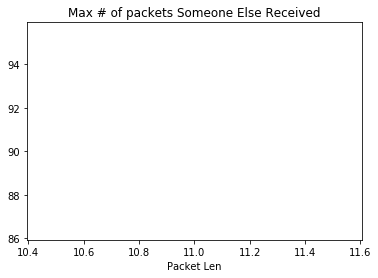

In [8]:
val1 = np.average(df.loc[df['PL'] == 11]['M.N.P.R'])
val2 = np.average(df.loc[df['PL'] == 21]['M.N.P.R'])
val3 = np.average(df.loc[df['PL'] == 31]['M.N.P.R'])
values = [val1, val2, val3]
plt.plot([11,21,31],values)
plt.title('Max # of packets Someone Else Received')
plt.xlabel('Packet Len')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


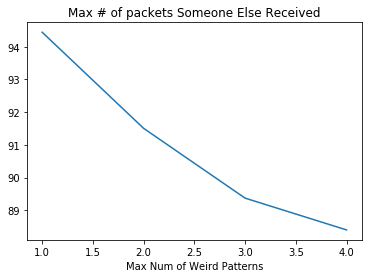

In [9]:
val1 = np.average(df.loc[df['M.W.P.'] == 0]['M.N.P.R'])
val2 = np.average(df.loc[df['M.W.P.'] == 1]['M.N.P.R'])
val3 = np.average(df.loc[df['M.W.P.'] == 2]['M.N.P.R'])
val4 = np.average(df.loc[df['M.W.P.'] == 3]['M.N.P.R'])
val5 = np.average(df.loc[df['M.W.P.'] == 4]['M.N.P.R'])
values = [val1, val2, val3, val4, val5]
plt.plot(range(len(values)),values)
plt.title('Max # of packets Someone Else Received')
plt.xlabel('Max Num of Weird Patterns')
plt.show()